In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("heart disease.csv")
df = df.drop(columns=['FastingBS'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,LVH,174,N,0.0,Flat,1


In [5]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0


In [6]:
df['Sex']=df['Sex'].astype('category')
df['Sex']=df['Sex'].cat.codes

df['ChestPainType']=df['ChestPainType'].astype('category')
df['ChestPainType']=df['ChestPainType'].cat.codes

df['RestingECG']=df['RestingECG'].astype('category')
df['RestingECG']=df['RestingECG'].cat.codes

df['ExerciseAngina']=df['ExerciseAngina'].astype('category')
df['ExerciseAngina']=df['ExerciseAngina'].cat.codes

df['ST_Slope']=df['ST_Slope'].astype('category')
df['ST_Slope']=df['ST_Slope'].cat.codes

In [7]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,1,172,0,0.0,2,0
1,49,0,2,160,180,1,156,0,1.0,1,1
2,37,1,1,130,283,2,98,0,0.0,2,0
3,48,0,0,138,214,1,108,1,1.5,1,1
4,54,1,2,150,195,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,1,132,0,1.2,1,1
914,68,1,0,144,193,1,141,0,3.4,1,1
915,57,1,0,130,131,1,115,1,1.2,1,1
916,57,0,1,130,236,0,174,0,0.0,1,1


In [8]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace(-1, np.nan)

In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
306,55,1,0,115,0,1,155,0,0.1,1
711,66,1,0,120,302,0,151,0,0.4,1
298,51,1,0,110,0,1,92,0,0.0,1
466,55,1,2,120,0,2,125,1,2.5,1
253,62,1,1,140,271,1,152,0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
909,63,0,0,124,197,1,136,1,0.0,1
293,65,1,0,115,0,1,93,1,0.0,1
761,52,1,0,112,230,1,160,0,0.0,2
2,37,1,1,130,283,2,98,0,0.0,2


In [14]:
y_predicted = model.predict(X_test)
print(y_predicted)
print(y_test.values)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1]
[1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1]


In [15]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
306,55,1,0,115,0,1,155,0,0.1,1
711,66,1,0,120,302,0,151,0,0.4,1
298,51,1,0,110,0,1,92,0,0.0,1
466,55,1,2,120,0,2,125,1,2.5,1
253,62,1,1,140,271,1,152,0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
909,63,0,0,124,197,1,136,1,0.0,1
293,65,1,0,115,0,1,93,1,0.0,1
761,52,1,0,112,230,1,160,0,0.0,2
2,37,1,1,130,283,2,98,0,0.0,2


In [16]:
X = df[['Age']].values
y = df['HeartDisease'].values

In [17]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [18]:
x_vals = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_pred = model.predict_proba(x_vals)[:, 1]

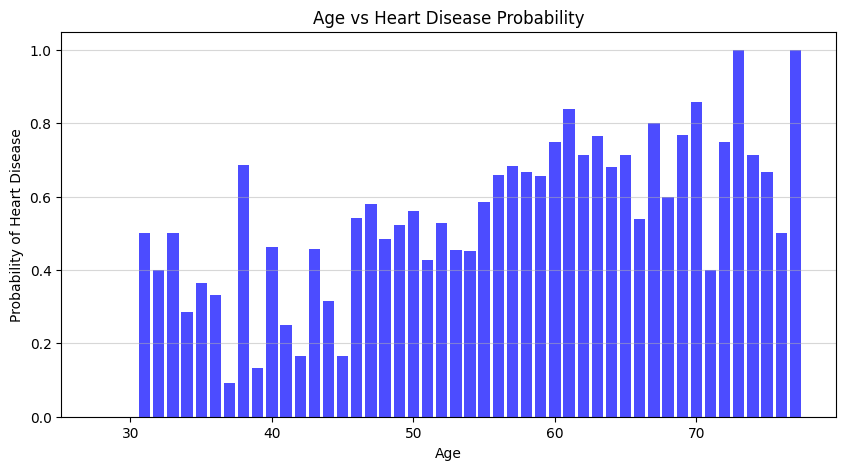

In [28]:
bar_data = df.groupby('Age')['HeartDisease'].mean()
plt.figure(figsize=(10,5))
plt.bar(bar_data.index, bar_data.values, alpha=0.7, color='blue')
plt.title("Age vs Heart Disease Probability")
plt.xlabel("Age")
plt.ylabel("Probability of Heart Disease")
plt.grid(axis='y', alpha=0.5)
plt.show()

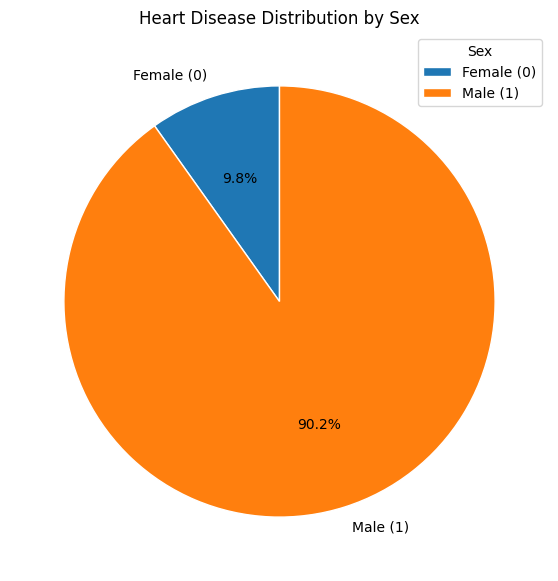

In [23]:
pie_data = df.groupby('Sex')['HeartDisease'].sum()
plt.figure(figsize=(7,7))
plt.pie(
    pie_data.values,
    labels=["Female (0)", "Male (1)"],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title("Heart Disease Distribution by Sex")
plt.legend(["Female (0)", "Male (1)"], title="Sex")
plt.show()

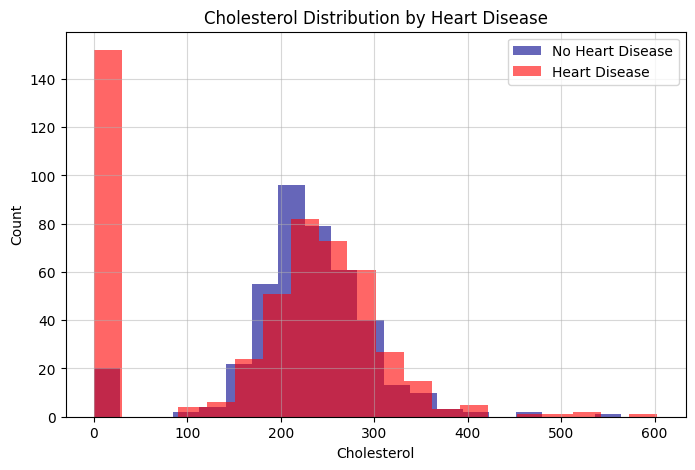

In [25]:
plt.figure(figsize=(8,5))
plt.hist(
    df[df['HeartDisease']==0]['Cholesterol'],
    bins=20,
    alpha=0.6,
    label='No Heart Disease',
    color='#00008B'
)
plt.hist(
    df[df['HeartDisease']==1]['Cholesterol'],
    bins=20,
    alpha=0.6,
    label='Heart Disease',
    color='red'
)
plt.title("Cholesterol Distribution by Heart Disease")
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

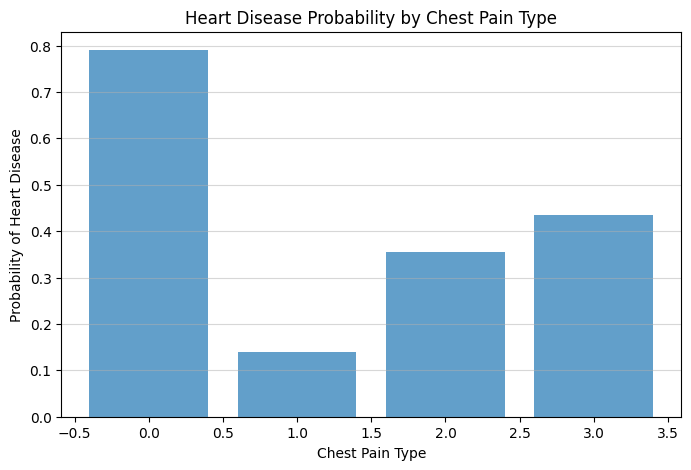

In [20]:
bar_data = df.groupby('ChestPainType')['HeartDisease'].mean()
plt.figure(figsize=(8,5))
plt.bar(bar_data.index, bar_data.values, alpha=0.7)
plt.title("Heart Disease Probability by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Probability of Heart Disease")
plt.grid(axis='y', alpha=0.5)
plt.show()

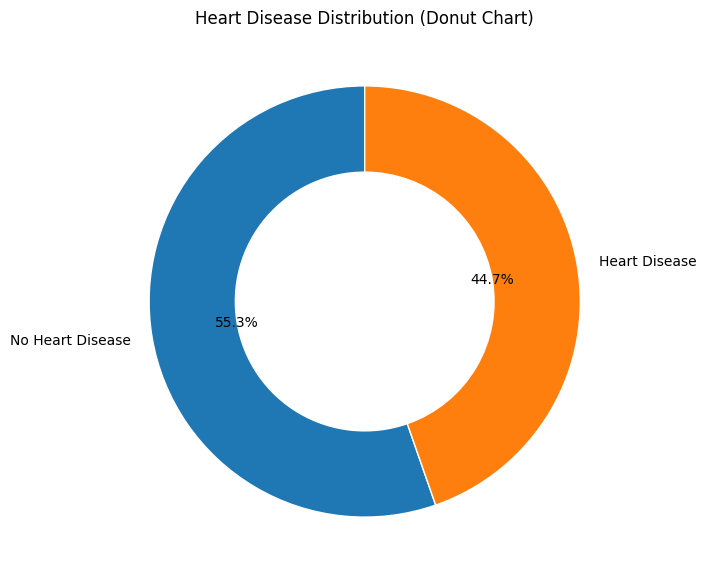

In [26]:
data = df['HeartDisease'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
plt.figure(figsize=(7,7))
plt.pie(
    data,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width':0.4, 'edgecolor':'white'}
)
plt.title("Heart Disease Distribution (Donut Chart)")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print("Accuracy:", accuracy_score(y_test, y_predicted))

Accuracy: 0.842391304347826
